# Solving Hypothesis Testing Problems:

**What is Population?**

**What is Sample?**

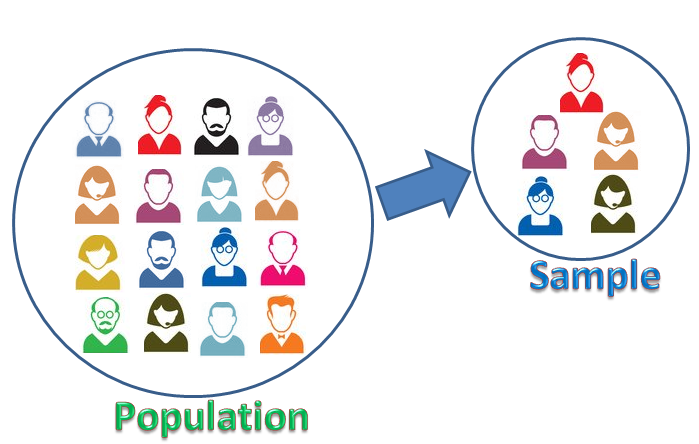

**Population Vs Sample parameters:**

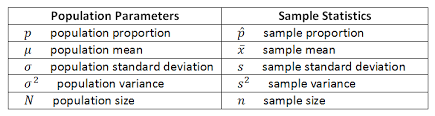

**Population mean($\mu$) Vs Sample mean($\bar x $):**

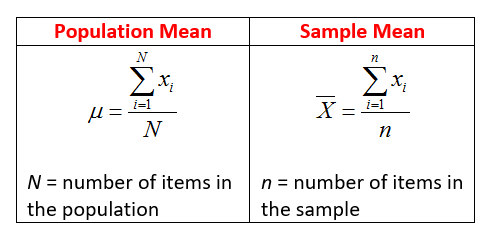

**Population standard deviation($ \sigma $) Vs Sample standard deviation ($ s $):**

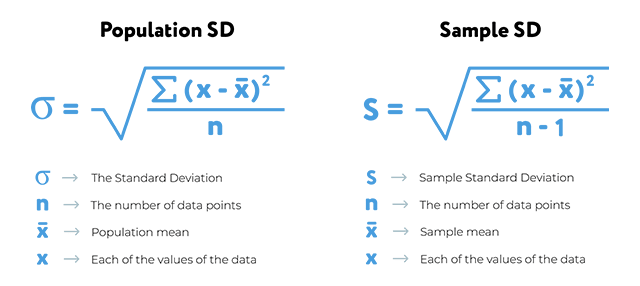

**Population variance($\sigma^2$) Vs Sample variance($s^2$):**

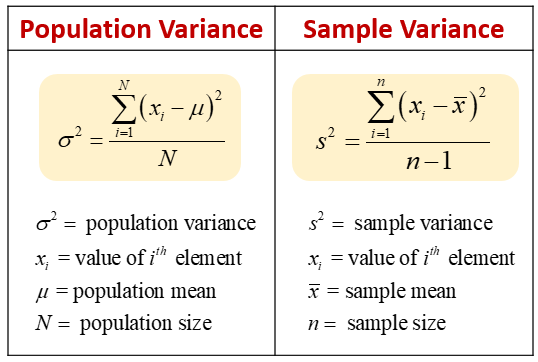

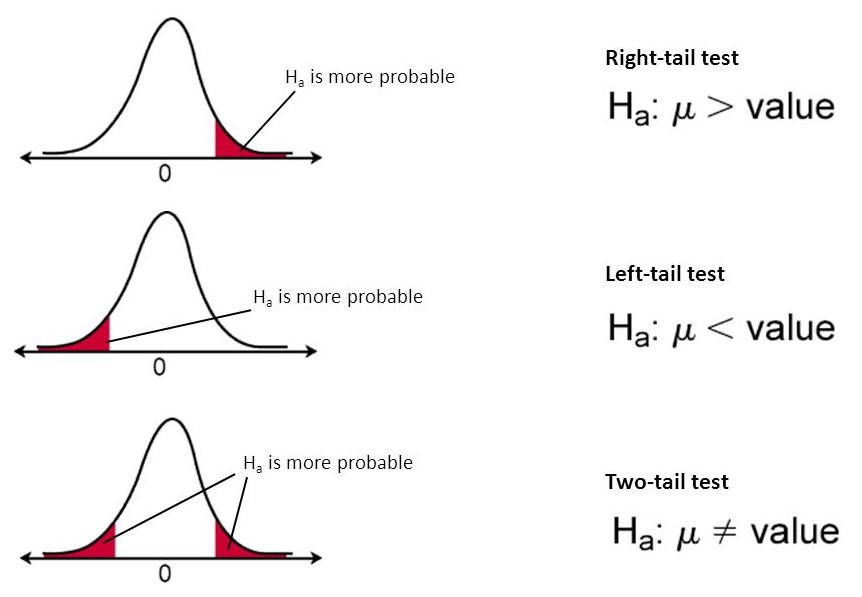

**Two-tailed test:**

*In statistics, a two-tailed test is a method in which the critical area of a distribution is two-sided and tests whether a sample is greater or less than a range of values.*

**Left-tailed test:**

*A Hypothesis Test where the rejection region is located to the extreme left of the distribution. A left-tailed test is conducted when the alternative hypothesis ($H_a$) contains the condition $H_a$  < x (less than a given quantity)*

**Right-tailed test:**

*A Hypothesis Test where the rejection region is located to the extreme right of the distribution. A right-tailed test is conducted when the alternative hypothesis $H_a$ contains the condition $H_a$ > x (greater than a given quantity).*

**importing necessary libraries**

In [1]:
#import pandas and numpy packages
import pandas as pd
import numpy as np

#import packages for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# In Jupyter notebook, directly below the code cell that produced resulting plots then  stored in the notebook document.
%matplotlib inline
from scipy.stats import norm,t
from math import sqrt

**t_score for sampling distribution:**

In [2]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sqrt(sample_size)
    return numerator / denomenator

#  Understanding Hypothesis testing:

**To implement the hypothesis testing we need to following below required steps:**

**Step-1:**

**We have to select the Hypothesis based on the given condition in the task wheather to accept the null hypothesis or not:**

**Alternate Hypothesis (Bold claim)**: $ H_1 \ \Rightarrow \ \gt, \ \lt, \ \neq  $


**Null Hypothesis (Status Quo)**: $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $

**Step-2:**

**collecting sample size and mean from the given sample:**

* Collect the Sample Size of N

* Collect the Mean from this Sample $\bar{x} $

**Step-3:**

**Compute test static based on the data :**

* If population variance is known
               
                   

$$
z=\frac{\bar x-\mu}{\frac{\sigma}{^2\sqrt n}}
$$

* If population variance is unknown

$$
z=\frac{\bar x-\mu}{\frac{s}{^2\sqrt n}}
$$

**Step-4:**

In this step we need to decide the significance level of $ \alpha $. lower $ \alpha $ in order to get strong evidence for rejecting the Null Hypothesis.

**Step-5.1:**

**Apply the rules:**

* **If test static is Z_score:**
  * Two tailed Z_test:
  $$|Z|>Z_\frac{\alpha}{2} \Rightarrow  Accept H_1 or    Reject H_0
  $$
  * Right tailed Z_test:
  $$Z>Z_\alpha \Rightarrow  Accept H_1 or Reject H_0
  $$
  * Left tailed Z_test:
  $$Z<-Z_\alpha \Rightarrow  Accept H_1 or    Reject H_0
  $$

 * **If test statistic is t_test:**
  * Two tailed t_test:
  $$|t|>t_n-1,\frac{\alpha}{2} \Rightarrow  Accept H_1 or    Reject H_0
  $$
  * Right tailed t_test:
  $$t>t_n-1,\alpha \Rightarrow  Accept H_1 or    Reject H_0
  $$
  * Left tailed t_test:
  $$t<t_n-1,\alpha \Rightarrow  Accept H_1 or    Reject H_0
  $$

**Step-5.2:**

**Compute the values P(Test Statistics\H_0):**

* For two tailed test:
$$ p-value=2*(1.0-cd f(test statistic)) $$
* For one tailed test:
$$p-value=(1.0-cd f(test statistic)) $$
Now,
$$if(p-value<\alpha \Rightarrow Accept H_1 or    Reject H_0 $$

**Calculating the given hypothesis problem by without the variance of population:**

*Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?*

**Step-1:**

Alternative Hypothesis(Bold claim):
    $$H_1 : ? $$

Null Hypothesis(Status Quo):
    $$ H_0 : ? $$

**Step-2:**

* Collect a sample of size n=10
   $$[490,220,470,500,495,496,496,498,508,480]$$
* Compute sample mean
$$\bar x= ?$$

**Step-3:**

Compute Test statistics:
    $$
t=\frac{\bar x-\mu}{\frac{s}{^2\sqrt n}}
$$

**Step-4:** Decide $\alpha $ or significance level

**Step -5.1:** ? tailed t-test:
$$ reject H_0 if ? $$

**Step-5.2:**Compute p-value

**Calculating the Sample Mean:**

In [3]:
l=[490,220,470,500,495,496,496,498,508,480]
sum(l)/len(l)

465.3

**Calculating the T-critical value using the two tailed test:**

In [4]:
#implementing the two tailed test method for calculating the t_critical
alpha=1-0.95
t_critical =t.ppf(1-alpha/2,df=9)
print(t_critical)

2.2621571627409915


**Calculating the sample Standard deviation:**

In [5]:
sample_std=np.std(l)
sample_std

82.3918078451978

**Defining the Sample and Population parameters:**

In [6]:
sample_size=10
sample_mean=465.3
pop_mean=500
sample_std=82.39

**Calculating the t_score:**

In [7]:
t=t_score(sample_size,sample_mean,pop_mean,sample_std)
print(t)

-1.3318489477830164


**Let's visualize the sample distribution rejection regions by ploting graphs:**

Text(465.3, 0.0007, 'x_bar')

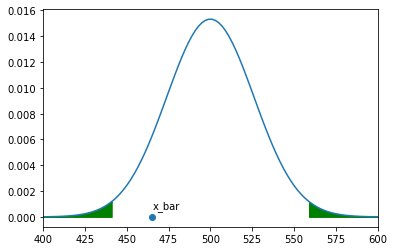

In [8]:
# Defining the x minimum and x maximum
x_min = 400
x_max = 600

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sqrt(sample_size)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')

# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='green')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

**Results by using t-test:**

In [9]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


*The above t-test results we can say that we are failing to reject the null hypothesis by performing the t-test:*

**Hypothesis results by using p-value:**

In [10]:
# Conclusion using p value

p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.18290982980044457
Fail to reject Null Hypothesis


**Here,performing p-value it is showing that it is fail to reject null hypothesis by performing p-test**

*Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?* 


**Step-1:**

Alternative Hypothesis(Bold claim):
    $$H_1 : ? $$

Null Hypothesis(Status Quo):
    $$ H_0 : ? $$

**Step-2:**

* Collect a sample of size n=20
   $$[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]$$
* Compute sample mean
$$\bar x= ?$$

**Step-3:**

Compute Test statistics:
    $$
t=\frac{\bar x-\mu}{\frac{s}{^2\sqrt n}}
$$

**Step-4:** Decide $\alpha $ or significance level

**Step -5.1:** ? tailed t-test:
$$ reject H_0 if ? $$

**Step-5.2:**Compute p-value

**Calculating the sample mean:**

In [11]:
l = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
sum(l)/len(l)

4.25

**Calculating Sample mean:**

In [12]:
## Implementing the one tail method for calculating the t_critical 

from scipy.stats import t

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [13]:
sample_std = np.std(l)
sample_std

0.82915619758885

**Sample and population:**

In [14]:
sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_std = 0.82

**Calculating t_score:**

In [15]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

1.3634560838413352


**Visualize the sample distribution rejection regions by ploting graphs:**

Text(4.25, 0.1, 'x_bar')

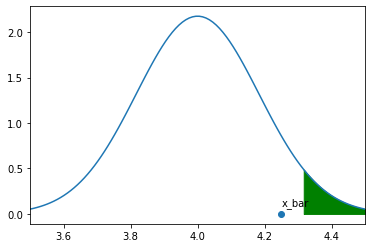

In [16]:
# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sqrt(sample_size)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')


# Ploting the sample mean and concluding the results 

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

**Using t-test:**

In [17]:
# Conclusion using z test

if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


**Testing hypothesis results by using p-test:**

In [18]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.08636940802398319
Fail to reject Null Hypothesis


*Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?* 

**Step-1:**

Alternative Hypothesis(Bold claim):
    $$H_1 : ? $$

Null Hypothesis(Status Quo):
    $$ H_0 : ? $$

**Step-2:**

* Collect a sample of size n=20
   $$[14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]$$
* Compute sample mean
$$\bar x= ?$$

**Step-3:**

Compute Test statistics:
    $$
t=\frac{\bar x-\mu}{\frac{s}{^2\sqrt n}}
$$

**Step-4:** Decide $\alpha $ or significance level

**Step -5.1:** ? tailed t-test:
$$ reject H_0 if ? $$

**Step-5.2:**Compute p-value

**Calculating Sample Mean:**

In [19]:
l=[14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
sum(l)/len(l)

15.098999999999998

In [20]:
sample_std=np.std(l)
sample_std

0.9994043225842081

**One-tail test to calculate t-critical value:**

In [21]:
## Implementing the one tail method for calculating the t_critical 

from scipy.stats import t

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


**Sample Distribution from mean sample:**

In [22]:
sample_size = 20
sample_mean = 15.1
pop_mean = 15
sample_std = 0.99

In [23]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

0.4517309045454104


**Sample rejection regions by plotting the graphs:**

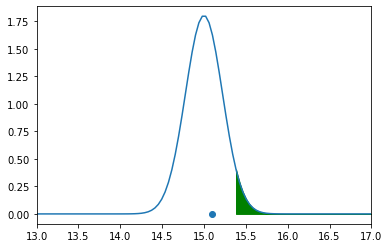

In [24]:
x_min = 13
x_max = 17

mean = pop_mean
std = sample_std / sqrt(sample_size)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
#plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')

plt.scatter(sample_mean, 0)

In [25]:
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [26]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.3257314258118913
Fail to reject Null Hypothesis


*Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?*

**Step-1:**

Alternative Hypothesis(Bold claim):
    $$H_1 : ? $$

Null Hypothesis(Status Quo):
    $$ H_0 : ? $$
    

**Step-2:**

* Collect a sample of size n=20
   
* Compute sample mean
$$\bar x= 97.5$$

**Step-3:**

Compute Test statistics:
    $$
t=\frac{\bar x-\mu}{\frac{s}{^2\sqrt n}}
$$

**Step-4:** Decide $\alpha $ or significance level

**Step -5.1:** ? tailed t-test:
$$ reject H_0 if ? $$

**Step-5.2:**Compute p-value

**One-tail test to calculate t_critical value:**

In [27]:
## implementing the one tail test to calculate the t_critical value

from scipy.stats import t

alpha = 1 - 0.99

t_critical = t.ppf(1 - alpha, df=19)

print(t_critical)

2.5394831906222883


In [28]:
sample_size = 100
sample_mean = 97.5
pop_mean = 100
sample_std = 8

In [29]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)

print(t)

-3.125


Text(97.5, 0.02, 'x_bar')

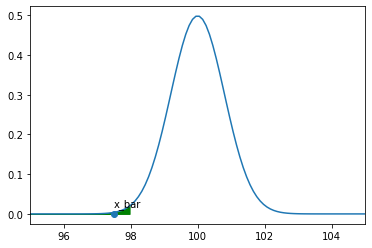

In [30]:
x_min = 95
x_max = 105

mean = pop_mean
std = sample_std / sqrt(sample_size)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

**t-test to check final result:**

In [31]:
if(t < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


**p-value method to check the final result:**

In [32]:
p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)

if(p_value < 0.01):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0008890252991083925
Reject Null Hypothesis
